#                            META STOCK PRICE PREDICTION

###### ** Import Necessary Libraries **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

######  ** Load and Preprocess the Data **

In [2]:
# Load the data
data = pd.read_csv('META.csv')

In [3]:
# Select the 'Close' column for prediction
data = data['Close'].values.astype(float)

In [4]:
# Normalize the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

In [5]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:]

###### ** Create Sequences of Data **

In [6]:

# Create sequences of data for training and testing
def create_sequences(data, lool_back):
    dataX, datay = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        dataX.append(a)
        datay.append(data[i+ look_back, 0])
    return np.array(dataX), np.array(datay)

In [7]:
look_back = 10  # You can adjust this parameter to change
X_train, y_train = create_sequences(train, look_back)
X_test, y_test = create_sequences(test, look_back)

###### ** Build the LSTM Model **

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [9]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

###### ** Train the Model **

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
191/191 [==============================] - 4s 8ms/step - loss: 0.0269 - val_loss: 0.0022
Epoch 2/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0062 - val_loss: 0.0013
Epoch 3/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0063 - val_loss: 0.0017
Epoch 4/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0055 - val_loss: 0.0012
Epoch 5/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 6/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0054 - val_loss: 0.0016
Epoch 7/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 8/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 9/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 10/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0042 - val_lo

######  ** Make Predictions **

In [11]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


2/2 [==============================] - 0s 12ms/step


In [12]:
# Inverse transform the predictions and actual values
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])


##### ** Evaluate the Model **

In [13]:
# Calculate RMSE (Root Mean Squared Error)
trainScore =  np.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))


Train RMSE: 9.95
Test RMSE: 6.51


###### ** Visualize the predictions **

In [14]:
# Shift the test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict) + look_back:len(data)] = testPredict[0, :]

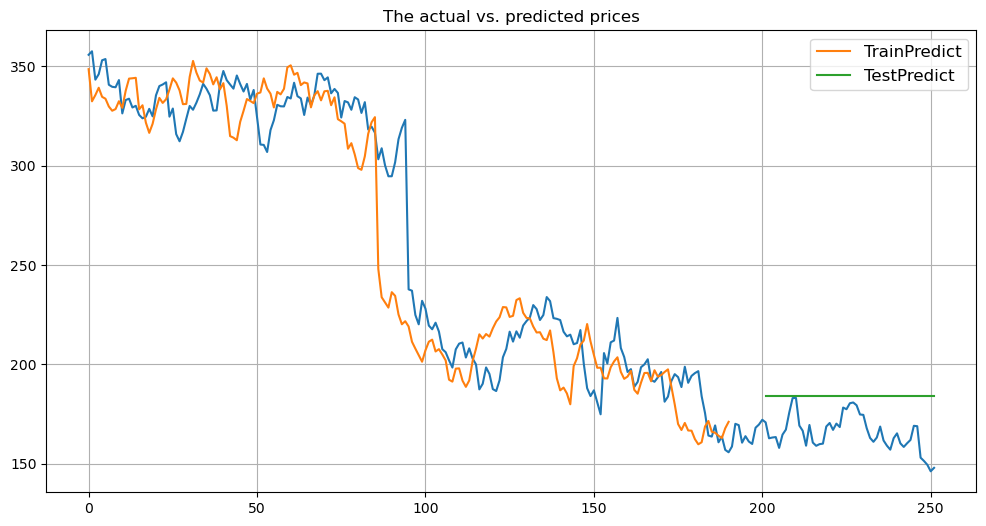

In [15]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredict, label= "TrainPredict")
plt.plot(testPredictPlot, label= "TestPredict")
plt.title("The actual vs. predicted prices")
plt.grid()
plt.legend(fontsize = "large")
plt.show()